In [1]:
import random
import matplotlib.pyplot as plt


In [2]:
# Function to generate a random chromosome
def randomChromosome(n):
    return [random.randint(1, n) for _ in range(n)]

# Function to generate a random initial population
def randomGeneration(p, n):
    return [randomChromosome(n) + [0] for _ in range(p)]

In [3]:
# Function to evaluate the fitness of each chromosome in the population
def fitness(population_list, n):
    for chromosome in population_list:
        if len(chromosome) != n + 1:
            raise ValueError("Chromosome length is not equal to n+1")
            
    for i in range(len(population_list)):
        non_attacking_pairs = n*(n-1)//2
        for j in range(len(population_list[i])-1):
            for k in range(j+1, len(population_list[i])):
                if population_list[i][j] == population_list[i][k] or abs(population_list[i][j] - population_list[i][k]) == abs(j - k):
                    non_attacking_pairs -= 1
        population_list[i][n] = non_attacking_pairs
        #print("Fitness of chromosome ", i, ": ", population_list[i][n])
    population_list.sort(key=lambda x: x[n], reverse=True)
    return population_list

In [4]:
# Function to perform the crossover between two parents
def crossover(parents):
    n = len(parents[0])
    offspring1 = parents[0][:n//2] + parents[1][n//2:] 
    offspring2 = parents[1][:n//2] + parents[0][n//2:] 
    return offspring1, offspring2

In [5]:
# Function to perform mutation on a chromosome
def mutation(chromosome):
    n = len(chromosome)-1
    mutated_chromosome = chromosome[:-1]
    i = random.randint(0,n-1)
    j = random.randint(1,n)
    mutated_chromosome[i] = j
    mutated_chromosome.append(0)
    return mutated_chromosome

In [6]:
# Function to perform roulette wheel selection
def roulette_wheel_selection(population):
    fitnesses = [chromosome[-1] for chromosome in population]
    total_fitness = sum(fitnesses)
    selection_probs = [fitness/total_fitness for fitness in fitnesses]
    cum_probs = [sum(selection_probs[:i+1]) for i in range(len(selection_probs))]
    parents = []
    for i in range(2):
        r = random.random()
        for j in range(len(cum_probs)):
            if r < cum_probs[j]:
                parents.append(population[j])
                break
    return parents

In [7]:
# Function to display the best solution
def showRes(population_list):
    print("Best Solution: ", population_list[0][:-1])
    print("Fitness: ", population_list[0][n])

In [8]:
# Function to display scatter plot
def show(id):
    l = len(id)
    plt.figure(figsize=(6, 6))
    plt.scatter([x+1 for x in range(l - 1)], id[:l - 1], color = 'blue')
    for i in range(l):
        plt.plot([0.5, l - 0.5], [i + 0.5, i + 0.5], color = "k")
        plt.plot([i + 0.5, i + 0.5], [0.5, l - 0.5], color = "k")

-------------------------------------------------------
Generation  1
Best Solution:  [4, 1, 4, 7, 8, 2, 5, 3]
Fitness:  23
-------------------------------------------------------
Generation  2
Best Solution:  [4, 1, 4, 7, 8, 2, 5, 3]
Fitness:  23
-------------------------------------------------------
Generation  3
Best Solution:  [4, 1, 4, 7, 8, 2, 5, 3]
Fitness:  23
-------------------------------------------------------
Generation  4
Best Solution:  [4, 1, 4, 7, 8, 2, 5, 3]
Fitness:  23
-------------------------------------------------------
Generation  5
Best Solution:  [4, 1, 4, 7, 8, 2, 5, 3]
Fitness:  23
-------------------------------------------------------
Generation  6
Best Solution:  [5, 1, 4, 7, 8, 2, 5, 3]
Fitness:  25
-------------------------------------------------------
Generation  7
Best Solution:  [5, 1, 4, 7, 8, 2, 5, 3]
Fitness:  25
-------------------------------------------------------
Generation  8
Best Solution:  [5, 1, 4, 7, 8, 2, 5, 3]
Fitness:  25
--------

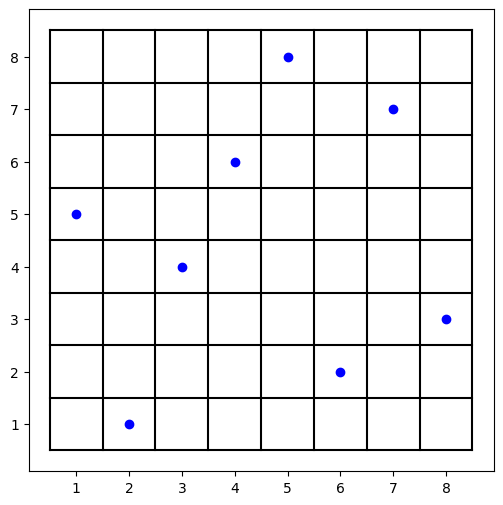

In [16]:
# Define the problem parameters
n = 8 # Number of queens
p = 30 # Population size

# Generate the initial population
current_generation = randomGeneration(p, n)
current_generation = fitness(current_generation, n)

# Evolution loop
gen = 1
while gen<999:
    print("-------------------------------------------------------")
    print("Generation ",gen)
    # Select the two most fit individuals from the current generation
    parents = roulette_wheel_selection(current_generation[:2])
#     print("Selected parents: ", parents)

    # Perform crossover between the parents
    offspring1, offspring2 = crossover(parents)
    fitness([offspring1, offspring2], n)
#     print("Offspring1: ", offspring1)
#     print("Offspring2: ", offspring2)

    # Perform mutation on both offspring
    mutated_offspring1 = mutation(offspring1)
    mutated_offspring2 = mutation(offspring2)

    # Evaluate the fitness of the mutated offspring
    offspring_fitness = fitness([mutated_offspring1, mutated_offspring2], n)
#     print("Mutated Offspring1: ", mutated_offspring1)
#     print("Mutated Offspring2: ", mutated_offspring2)

    # Add the offspring to the population
    current_generation += offspring_fitness

    # Sort the population by fitness value in descending order
    current_generation.sort(key=lambda x: x[n], reverse=True)

    # Display the best solution of the current generation
    showRes(current_generation)

    # Check if the best solution has been found
    if current_generation[0][n] == 28:
        print("-------------------------------------------------------")
        print("Evolution completed")
        show(current_generation[0])
        break

    # Increment the generation counter
    gen += 1